<a href="https://colab.research.google.com/github/Antel0pe/VoronoiDiagrams/blob/main/HURDAT2_Voronoi_Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json

# Assuming hurdat2.json is uploaded to the Colab environment
try:
  with open('processed-hurdat2.json', 'r') as f:
    data = json.load(f)
    # Now you can work with the 'data' variable, which contains the JSON data.
    # Example: Print the keys of the first item
    print(data)

except FileNotFoundError:
    print("Error: hurdat2.json not found. Please upload the file.")
except json.JSONDecodeError:
    print("Error: Invalid JSON format in hurdat2.json")


[{'storm_id': '1950', 'name': 'ABLE', 'num_records': 51, 'observations': [{'date': '1950-08-12', 'time': '00:00 UTC', 'latitude': 17.1, 'longitude': -55.5, 'wind_speed': 35, 'pressure': -999}, {'date': '1950-08-12', 'time': '06:00 UTC', 'latitude': 17.7, 'longitude': -56.3, 'wind_speed': 40, 'pressure': -999}, {'date': '1950-08-12', 'time': '12:00 UTC', 'latitude': 18.2, 'longitude': -57.4, 'wind_speed': 45, 'pressure': -999}, {'date': '1950-08-12', 'time': '18:00 UTC', 'latitude': 19.0, 'longitude': -58.6, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '00:00 UTC', 'latitude': 20.0, 'longitude': -60.0, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '06:00 UTC', 'latitude': 20.7, 'longitude': -61.1, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '12:00 UTC', 'latitude': 21.3, 'longitude': -62.2, 'wind_speed': 55, 'pressure': -999}, {'date': '1950-08-13', 'time': '18:00 UTC', 'latitude': 22.0, 'longitude': -63.2, 'wind_speed

In [3]:
latLongs = []
latLongLookup = {}

for storm in data:
    for obs in storm['observations']:
        latLongs.append((obs['latitude'], obs['longitude']))
        latLongLookup[(obs['latitude'], obs['longitude'])] = storm['name'] + ' ' + storm['storm_id'] + ' ' + obs['date'] + ' ' + obs['time']

print(latLongs)
print(latLongLookup)

[(17.1, -55.5), (17.7, -56.3), (18.2, -57.4), (19.0, -58.6), (20.0, -60.0), (20.7, -61.1), (21.3, -62.2), (22.0, -63.2), (22.7, -63.8), (23.1, -64.6), (23.4, -65.4), (23.9, -66.0), (24.4, -66.2), (24.8, -66.5), (25.2, -66.8), (25.5, -67.5), (25.7, -68.1), (25.7, -68.7), (25.5, -69.3), (25.4, -69.8), (25.4, -70.6), (25.4, -71.5), (25.5, -72.6), (25.9, -73.3), (26.7, -73.9), (27.3, -74.4), (27.9, -74.9), (28.4, -75.3), (29.1, -75.5), (29.9, -75.5), (30.7, -75.5), (31.7, -75.5), (32.8, -75.2), (34.4, -74.3), (36.0, -72.7), (37.6, -71.0), (39.3, -69.4), (41.2, -67.3), (43.3, -65.0), (44.6, -63.7), (45.5, -62.6), (47.9, -59.8), (50.0, -56.8), (52.0, -53.8), (53.6, -50.7), (54.7, -47.7), (55.3, -44.8), (55.3, -41.8), (54.5, -37.7), (53.5, -33.7), (52.5, -30.3), (12.0, -54.0), (12.5, -54.2), (13.0, -54.4), (13.5, -54.7), (14.0, -55.0), (14.5, -55.4), (15.0, -55.9), (15.5, -56.4), (16.0, -57.0), (16.3, -57.9), (16.6, -58.8), (16.8, -59.8), (16.9, -60.6), (17.0, -61.0), (17.0, -61.4), (16.9, -6

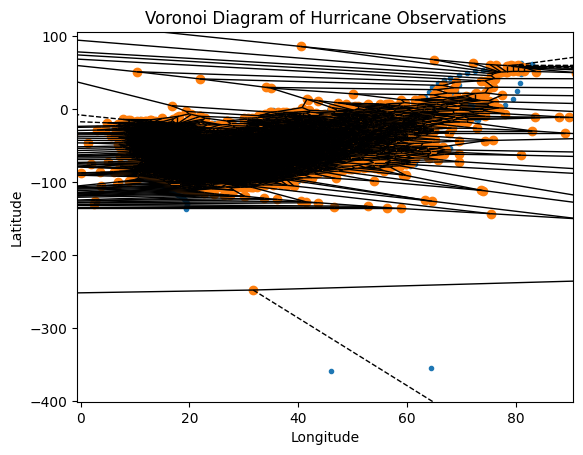

In [4]:
# prompt: generate and plot voronoi diagram with scipy spatial

import json
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate Voronoi diagram
vor = Voronoi(latLongs)

# Plot the Voronoi diagram
fig = voronoi_plot_2d(vor)
plt.title("Voronoi Diagram of Hurricane Observations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Looking for point: [ 17.2 -55.4]

Nearest Point Index: 12032
Distance: 0.1000
Nearest Point: [ 17.2 -55.3]
Associated Storm: ANDREW 1992 1992-08-19 06:00 UTC


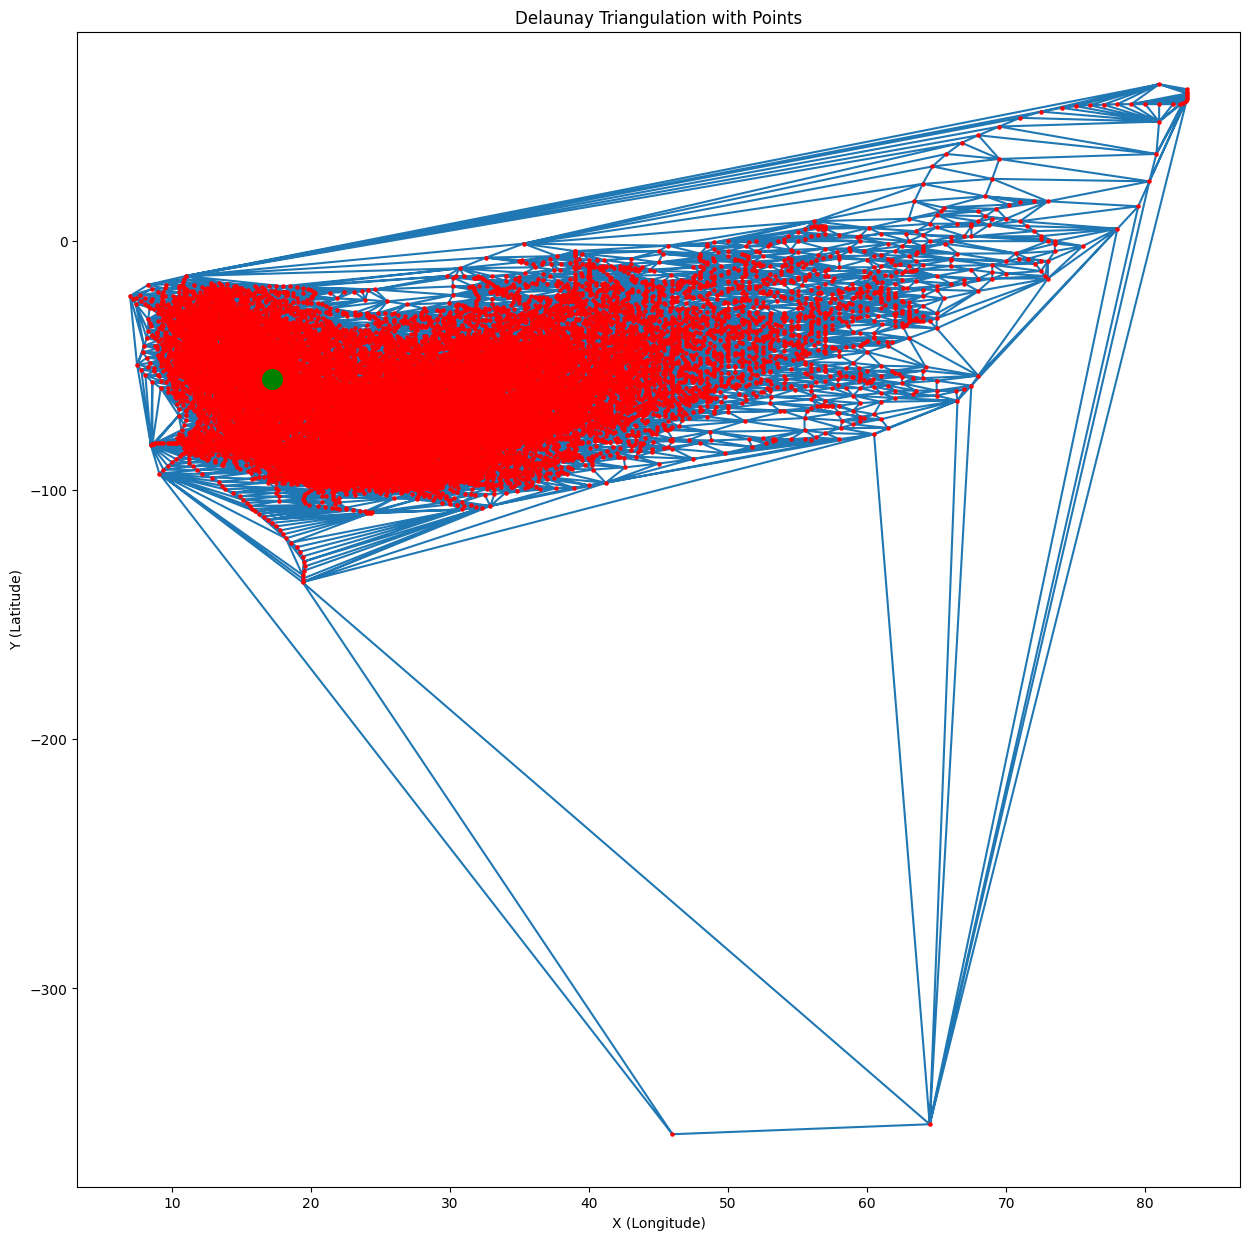

In [5]:
import numpy as np
from scipy.spatial import Voronoi, Delaunay
import matplotlib.pyplot as plt

class EfficientVoronoiLocator:
    def __init__(self, points):
        """
        Initialize the locator with a set of points.

        Parameters:
        points (np.ndarray): Array of points with shape (n, 2)
        """
        self.points = points

        # Compute Delaunay triangulation for efficient spatial indexing
        self.delaunay = Delaunay(points)

        # Compute Voronoi diagram
        self.voronoi = Voronoi(points)

    def find_nearest_point(self, target_point, give_second_closest=False):
        """
        Find the nearest point efficiently using Delaunay triangulation.

        Parameters:
        target_point (np.ndarray): Target point to find nearest neighbor for

        Returns:
        tuple: (index, distance, nearest_point)
        """
        # First, find which simplex (triangle) contains the point
        simplex_index = self.delaunay.find_simplex(target_point)

        if simplex_index == -1:
            # If point is outside the convex hull, use brute force
            distances = np.sqrt(np.sum((self.points - target_point)**2, axis=1))
            nearest_index = np.argmin(distances)
        else:
            # Get the indices of points in the containing simplex
            simplex_indices = self.delaunay.simplices[simplex_index]

            # Calculate distances to these points
            local_points = self.points[simplex_indices]
            local_distances = np.sqrt(np.sum((local_points - target_point)**2, axis=1))

            if give_second_closest:
                # Find the second nearest point
                second_nearest_index = np.argsort(local_distances)[1]
                nearest_index = simplex_indices[second_nearest_index]
            else:
                # Find the nearest point among these
                local_nearest_index = np.argmin(local_distances)
                nearest_index = simplex_indices[local_nearest_index]

        # Calculate final distance and nearest point
        nearest_point = self.points[nearest_index]
        distance = np.linalg.norm(nearest_point - target_point)

        return nearest_index, distance, nearest_point

    def plot(self, highlight_point=None):
        """
        Visualize the points and optionally a specific point.

        Parameters:
        highlight_point (np.ndarray, optional): Point to highlight
        """
        plt.figure(figsize=(15, 15))

        # Plot Delaunay triangulation
        plt.triplot(self.points[:, 0], self.points[:, 1],
                    self.delaunay.simplices)

        # Plot original points
        plt.scatter(self.points[:, 0], self.points[:, 1],
                    color='red', s=5, zorder=10)

        # Highlight specific point if provided
        if highlight_point is not None:
            plt.scatter(highlight_point[0], highlight_point[1],
                        color='green', s=200, zorder=15)

        plt.title('Delaunay Triangulation with Points')
        plt.xlabel('X (Longitude)')
        plt.ylabel('Y (Latitude)')
        plt.show()

# Example usage
def example_usage():
    # Sample points (e.g., hurricane locations)
    points = np.array(latLongs)

    # Create locator
    locator = EfficientVoronoiLocator(points)

    # Target point to find nearest neighbor
    target_point = np.array([17.2, -55.4])

    # Find nearest point
    index, distance, nearest_point = locator.find_nearest_point(target_point, False)
    associatedStorm = latLongLookup[(nearest_point[0], nearest_point[1])]

    print(f"Looking for point: {target_point}\n")
    print(f"Nearest Point Index: {index}")
    print(f"Distance: {distance:.4f}")
    print(f"Nearest Point: {nearest_point}")
    print(f"Associated Storm: {associatedStorm}")

    # Visualize
    locator.plot(highlight_point=target_point)

# Uncomment to run example
example_usage()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional

class Point:
    """Represents a point with x and y coordinates."""
    def __init__(self, x: float, y: float, index: int = None):
        self.x = x
        self.y = y
        self.index = index

    def __repr__(self):
        return f"Point({self.x}, {self.y}, index={self.index})"

    def __eq__(self, other):
        return np.isclose(self.x, other.x) and np.isclose(self.y, other.y)

class Triangle:
    """Represents a triangle with three points."""
    def __init__(self, p1: Point, p2: Point, p3: Point):
        self.points = [p1, p2, p3]
        self.circumcircle = self._compute_circumcircle()

    def _compute_circumcircle(self) -> Optional[Tuple[float, float, float]]:
        """
        Compute the circumcircle of the triangle.
        Returns (center_x, center_y, radius) or None if points are collinear.
        """
        a, b, c = self.points
        # Compute determinant to check collinearity
        det = (b.x - a.x) * (c.y - a.y) - (c.x - a.x) * (b.y - a.y)
        if np.isclose(det, 0):
            return None

        # Circumcenter computation using perpendicular bisectors
        ax2, ay2 = a.x**2, a.y**2
        bx2, by2 = b.x**2, b.y**2
        cx2, cy2 = c.x**2, c.y**2

        # Compute circumcenter
        cx = ((cy2 - ay2) * (b.x - a.x) + (by2 - ay2) * (c.x - a.x)) / (2 * det)
        cy = ((ax2 - bx2) * (c.y - b.y) + (bx2 - cx2) * (a.y - c.y)) / (2 * det)

        # Compute radius
        radius = np.sqrt(((cx - a.x)**2 + (cy - a.y)**2))

        return (cx, cy, radius)

    def is_point_in_circumcircle(self, point: Point) -> bool:
        """Check if a point lies inside the triangle's circumcircle."""
        if self.circumcircle is None:
            return False

        cx, cy, radius = self.circumcircle
        dist = np.sqrt((point.x - cx)**2 + (point.y - cy)**2)
        return dist < radius

def is_point_in_triangle(point: Point, triangle: Triangle) -> bool:
    """Check if a point is inside a triangle using barycentric coordinates."""
    p1, p2, p3 = triangle.points

    def sign(p1: Point, p2: Point, p3: Point) -> float:
        return (p1.x - p3.x) * (p2.y - p3.y) - (p2.x - p3.x) * (p1.y - p3.y)

    d1 = sign(point, p1, p2)
    d2 = sign(point, p2, p3)
    d3 = sign(point, p3, p1)

    has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
    has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)

    return not (has_neg and has_pos)

def is_lexicographically_higher(p1: Point, p2: Point) -> bool:
    """
    Check if p1 is lexicographically higher than p2.
    Higher y-coordinate or equal y with larger x-coordinate.
    """
    return p1.y > p2.y or (np.isclose(p1.y, p2.y) and p1.x > p2.x)

class DelaunayTriangulation:
    def __init__(self, points: List[Point]):
        # Find highest point (p0)
        self.p0 = max(points, key=lambda p: (p.y, p.x))

        # Create auxiliary points p-1 and p-2
        self.p_minus1 = Point(float('inf'), float('-inf'), index=-1)
        self.p_minus2 = Point(float('-inf'), float('inf'), index=-2)

        # Add auxiliary points to point set
        self.points = points + [self.p_minus1, self.p_minus2]

        # Initial triangulation is the triangle containing all points
        self.triangulation = [Triangle(self.p0, self.p_minus1, self.p_minus2)]

        # Random permutation of points (excluding p0, p_minus1, p_minus2)
        np.random.seed(42)  # for reproducibility
        self.insertion_order = np.random.permutation(
            [p for p in points if p != self.p0]
        )

    def legalize_edge(self, current_point: Point, edge: Tuple[Point, Point], triangulation: List[Triangle]):
        """
        Recursively legalize edges after point insertion.
        If an edge is illegal (circumcircle contains another point), flip the edge.
        """
        # Find triangles adjacent to the edge
        # adjacent_triangles = [t for t in triangulation if set(edge).issubset(set(t.points))]
        adjacent_triangles = [t for t in triangulation if set(edge[0]).issubset(set(t.points)) and set(edge[1]).issubset(set(t.points))]

        if len(adjacent_triangles) != 2:
            return

        t1, t2 = adjacent_triangles

        # Find the point not in the common edge
        p1 = [p for p in t1.points if p not in edge][0]
        p2 = [p for p in t2.points if p not in edge][0]

        # Check if the edge is illegal
        if t1.is_point_in_circumcircle(p2):
            # Flip the edge
            new_triangle1 = Triangle(p1, p2, edge[0])
            new_triangle2 = Triangle(p1, p2, edge[1])

            # Replace old triangles
            triangulation.remove(t1)
            triangulation.remove(t2)
            triangulation.extend([new_triangle1, new_triangle2])

            # Recursively legalize new edges
            self.legalize_edge(current_point, (p1, p2), triangulation)
            self.legalize_edge(current_point, (p1, edge[0]), triangulation)
            self.legalize_edge(current_point, (p1, edge[1]), triangulation)

    def compute(self) -> List[Triangle]:
        """
        Compute Delaunay triangulation using randomized incremental algorithm.
        Follow the algorithm described in the text exactly.
        """
        # Iterate through points in random order
        for point in self.insertion_order:
            # Find triangle containing the point
            containing_triangle = None
            for triangle in self.triangulation:
                if is_point_in_triangle(point, triangle):
                    containing_triangle = triangle
                    break

            if containing_triangle is None:
                continue

            # Split triangle by creating three new triangles
            new_triangles = [
                Triangle(point, containing_triangle.points[0], containing_triangle.points[1]),
                Triangle(point, containing_triangle.points[1], containing_triangle.points[2]),
                Triangle(point, containing_triangle.points[2], containing_triangle.points[0])
            ]

            # Remove old triangle, add new triangles
            self.triangulation.remove(containing_triangle)
            self.triangulation.extend(new_triangles)

            # Legalize edges
            for new_triangle in new_triangles:
                for i in range(3):
                    edge = (new_triangle.points[i], new_triangle.points[(i+1)%3])
                    self.legalize_edge(point, edge, self.triangulation)

        # Remove triangles with auxiliary points
        self.triangulation = [
            triangle for triangle in self.triangulation
            if all(p.index is not None and p.index >= 0 for p in triangle.points)
        ]

        return self.triangulation

def plot_delaunay_triangulation(points: List[Point], triangulation: List[Triangle]):
    """Visualize the Delaunay triangulation"""
    plt.figure(figsize=(10, 10))

    # Plot points
    x = [p.x for p in points]
    y = [p.y for p in points]
    plt.scatter(x, y, color='red')

    # Plot triangles
    for triangle in triangulation:
        coords = [(p.x, p.y) for p in triangle.points]
        coords.append(coords[0])  # Close the triangle
        xs, ys = zip(*coords)
        plt.plot(xs, ys, 'b-')

    plt.title('Delaunay Triangulation')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.show()

# Example usage
def main():
    # Generate random points
    np.random.seed(42)
    points = [Point(x, y, index=i) for i, (x, y) in enumerate(latLongs)]

    # Compute Delaunay triangulation
    delaunay = DelaunayTriangulation(points)
    triangulation = delaunay.compute()

    # Visualize
    plot_delaunay_triangulation(points, triangulation)

main()

[Point(26.4, -55.5, index=6112), Point(81.0, 63.0, index=783), Point(inf, -inf, index=-1)]


TypeError: unhashable type: 'Point'